# Chapter 3: Neural Network


## 本章のまとめ
  
- ニューラルネットワークでは、活性化関数としてシグモイド関数やReLU関数のような滑らかに変化する関数を利用する。
- NumPyの多次元配列を馬雨使うことで、ニューラルネットワークを効率よく実装できる。
- 機械学習の問題は、回帰問題と分類問題に大別できる。
- 出力層で使用する活性化関数は、回帰問題では恒等関数、分類問題ではソフトまっk数関数を一般的に利用する。
- 入力データでは、出力層のニューロンの数を分類するクラス数に設定する。
- 入力データのまとまりをバッチと言い、バッチ単位で推論処理を行うことで、計算を高速化できる。

## パーセプトロンからニューラルネットワークへ

パーセプトロンは層を重ねることによって柔軟な表現が可能な一方で、  
それぞれの層の重みは全て手動で設定しなければならず、  
強みである複雑な表現を行うことへのハードルが高いという残念さを持っていた。  
  
ニューラルネットワークはこの残念さを解消すべく、**適切な重みを自動で学習できるようにした。**  
  
ニューラルネットワークは多層からなる。  
一番左の層を入力層、一番右の層を*出力層*、その中間の層を*中間層（または隠れ層）*と呼ぶ。  
なお、ここでは一番左から、「第0層、第1層、第2層」と0スタートで層を数える。  
  
$\begin{eqnarray}
\left\{
\begin{array}{l}
y=0&(b+w_{1}x_{1}+w_{2}x_{2}\leq0)\\
y=1&(b+w_{1}x_{1}+w_{2}x_{2}>0)
\end{array}
\right.
\nonumber
\end{eqnarray}$
  
上記のパーセプトロンの式をシンプルに書き換える。  
なお$h$は係数ではなく関数$h()$を表している。  
  
$\begin{eqnarray}
y=h(b+w_{1}x_{1}+w_{2}x_{2})\\
\left\{
\begin{array}{l}
h(x)=0&(x\leq0)\\
h(x)=1&(x>0)
\end{array}
\right.
\nonumber
\end{eqnarray}$
  
$h(x)$、つまり$\begin{eqnarray} b+w_{1}x_{1}+w_{2}x_{2} \nonumber\end{eqnarray}$の符号によって出力を決定しているので、  
先程の式と同じことを表していることがわかる。  
  
ここで登場した$h(x)$という関数（入力信号の総和を出力信号に変換する関数）のことを、  
一般的には*活性化関数（activation function）*と呼ぶ。  
名前の通り、活性化関数は入力信号の総和がどのように活性化するか（発火するか）を決定する。  
  
更に上記の式を書き換えると、以下の2段階の式にわけられる。  

$\begin{eqnarray}
\left\{
\begin{array}{l}
a=b+w_{1}x_{1}+w_{2}x_{2}\\
y=h(a)
\end{array}
\right.
\nonumber
\end{eqnarray}$  
  
**つまり、重み付き入力信号とバイアスの総和が$a$というノードになり、  
活性化関数$h()$によって$y$というノードに変換されている。（本書図3−4）**

## 活性化関数

### シグモイド関数
  
$\begin{eqnarray}
h(x)=\frac{1}{1+exp(-x)}
\nonumber
\end{eqnarray}$
  
ニューラルネットワークでは上記のシグモイド関数を活性化関数に用いて、  
信号の変換を行い、その変換された信号が次のニューロンへ伝えられる。  
実はパーセプトロンとニューラルネットワークの違いは、この活性化関数だけ。

### ステップ関数の実装
  
*ステップ関数*とは、以下の式のように、入力が0を超えたら1を出力し、  
それ以外は0を出力する関数のこと。
  
$\begin{eqnarray}
\left\{
\begin{array}{l}
h(x)=0&(x\leq0)\\
h(x)=1&(x>0)
\end{array}
\right.
\nonumber
\end{eqnarray}$  
  
単純なステップ関数を実装してみる。

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

この実装方法だと、引数に数値を一つのみしか入れられず、NumPy配列に対応していない。  
今後のことを考え以下のように改良を加える。

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

**上記の関数ではブーリアンの配列を作成し、それを数値に変換することでステップ関数と同じ機能を実装している。**  
上記の関数をステップごとに分解して実行してみる。

In [3]:
import numpy as np
x = np.array([-1, 1, 2])
x

array([-1,  1,  2])

In [4]:
y = x > 0
y

array([False,  True,  True])

In [5]:
y = y.astype(np.int)
y

array([0, 1, 1])

上記で定義したステップ関数をグラフで表してみる。

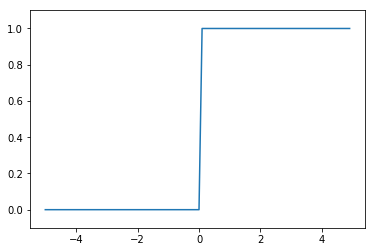

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # setting the range of y
plt.show()

## シグモイド関数の実装
  
次にシグモイド関数を実装する。  
Pythonでは次のように書くことができる。

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

上記の定義でもNumPy配列にきちんと対応していることを確認する。

In [8]:
x = np.array([-1, 1, 2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

NumPy配列にも対応しているのは、実はNumPyのブロードキャスト機能のおかげ。  
1章でも確認したように、スカラー値をNumPy配列として扱って計算してくれる。

In [9]:
x = np.array([1, 2, 3])
1 + x

array([2, 3, 4])

In [10]:
1 / x

array([1.        , 0.5       , 0.33333333])

グラフを実装すると以下のようになる。

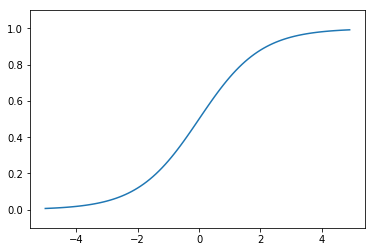

In [11]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

ステップ関数とシグモイド関数を比較してみる。

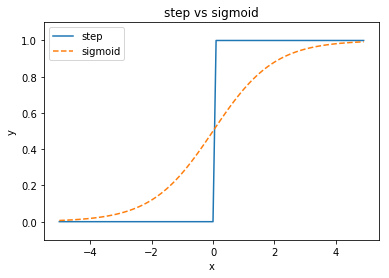

In [12]:
x = np.arange(-5, 5, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, label='step')
plt.plot(x, y2, linestyle='--', label='sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.title('step vs sigmoid')
plt.ylim(-0.1, 1.1)  # setting the range of y
plt.legend()
plt.show()

シグモイド関数とステップ関数を比べると以下のような特徴に気付く。  
  
相違点  
- シグモイド関数のほうが滑らかな曲線であり、入力に対して連続的に出力が変化する。  
- ステップ関数の出力がバイナリなのに対して、シグモイド関数は0.731...などの実数値を出力する。  
  
共通点
- 両者とも入力値が小さいときには出力が0に近づき、入力値が大きいときには出力が1に近づく。  
- どんなに入力信号の値が大きくても、出力信号の値を0から1の間に押し込むことができる。
  
3つ目の特徴からは、入力信号が重要な情報であれば大きな値が、重要でなければ小さな値が出力されることがわかる。  
また、**一番重要な共通点として非線形関数であることが挙げられる。**  
  
線形関数とは、出力が入力の定数倍になるような、直線で表される関数のことで、  
非線形関数とは直線で表すことのできない関数のこと。  
  
**ニューラルネットワークでは、活性化関数に非線形関数を用いる必要がある。**  
**なぜなら、線形関数を用いると、ニューラルネットワークで層を深くする意味がなくなるから。**  
これはどんなに層を深くしてもそれと同じことを行う「隠れ層のないネットワーク」が必ず存在するという事実に起因する。  
  
例えば、線形関数である$\begin{eqnarray}h(x)=cx\end{eqnarray}$を活性化関数として、  
$\begin{eqnarray}y(x)=h(h(h(x)))\end{eqnarray}$という3層のネットワークについて考えてみる。  
  
この計算は$\begin{eqnarray}y(x)=c\times c\times c\times x\end{eqnarray}$の掛け算を行うが、$\begin{eqnarray}y(x)=ax&&(a=c^{3})\end{eqnarray}$という1回の掛け算で表すことができる。  
つまり、隠れ層のない1層のネットワークで表すことができるので、線形関数を用いると多層ネットワークにする利点を活かすことができない。  
  
これまで述べた通り、パーセプトロンは多層化することで複雑な表現を可能にしたが、重みを手動で設定しなければならなかった。
その欠点を補い、自動で適切な重みを設定することで多層表現を容易にしたのがニューラルネットワークである。
そのニューラルネットワークの強みである多層表現を行うには、活性化関数に非線形関数を用いる必要がある。

### ReLu関数
  
ニューラルネットワークの世界では古くからシグモイド関数が利用されていたが、最近では*ReLu関数*が用いられる。  
ReLuは入力が0を超えていればその入力値をそのまま出力し、0以下なら0を出力する関数であり、数式では以下のように表すことができる。  

$\begin{eqnarray}
h(x)=
\left\{
\begin{array}{l}
x&(x>0)\\
0&(x\leq0)
\end{array}
\right.
\nonumber
\end{eqnarray}$  
  
Pythonでの実装は以下のように書ける。   

In [13]:
def relu(x):
    return np.maximum(0, x)

NumPyの`maximum`という関数はを使うと、簡単に実装できた。  
`maximum`関数は入力された値から大きい方の値を選んで出力してくれる。  
  
ReLuのグラフは以下のようになる。

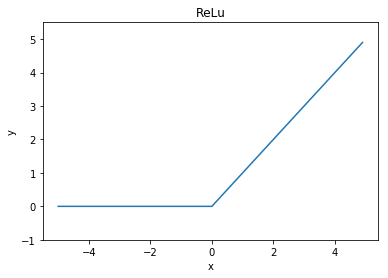

In [14]:
x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 5.5)
plt.title('ReLu')
plt.show()

## ニューラルネットワークの内積
  
まずはNumPyについて。  
  
`np.ndim(A)`で次元数を取得可能。  
`A.shape`で配列の形状を知ることができる。  
`np.dot(A, B)`で内積の計算が可能。  
  
ではNumPy行列を利用して、実際にニューラルネットワークの実装を行っていく。  
実装に当たって$X$、$W$、$Y$の形状に注意する。  
特に$X$と$W$の対応する次元の要素数が一致していることが重要。

In [15]:
X = np.array([1, 2])
X.shape

(2,)

In [16]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)

[[1 3 5]
 [2 4 6]]
(2, 3)


In [17]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


このように`np.dot(A, B)`（内積）を利用することによって、$Y$の結果を一度に計算することができる。  
つまり、$Y$の要素が10,000個あった場合でも、一度の演算で計算できるという利点がある。  
もし`np.dot(A, B)`を使わなければ、$Y$の要素を一つずつ取り出して計算したり、`for`を回さなければならず面倒。  

## 3層ニューラルネットワークの実装
  
それでは実践的なニューラルネットワークの実装を行う。  
ここでは、入力層は2つ、1つ目の隠れ層は3つ、2つ目の隠れ層は2つ、出力層は2つの3層ニューラルネットワークを実装する。  
添字については以下のように記載する。  
  
$\begin{eqnarray}x_{2}\nonumber\end{eqnarray}$： 入力層の2番目の入力値  
  
$\begin{eqnarray}a_{3}^{(1)}\nonumber\end{eqnarray}$：　第1層目の3番目のニューロン  
  
$\begin{eqnarray}w_{32}^{(1)}\nonumber\end{eqnarray}$：　第1層目のニューロンへの重み／前層の2番目のニューロンから次層の3番目のニューロンへ  
  
つまり以下のようになる。  
  
$\begin{eqnarray}{\Large x_{2}}
\ \ \  {\small \begin{split}\longrightarrow \\ w_{32}^{(1)}\end{split}}
\ \ \ \Large{a_{3}^{(1)}}\nonumber\end{eqnarray}$  
  
また、バイアス$b$は次のように表記する。  
  
$\begin{eqnarray}b_{3}^{(1)}\nonumber\end{eqnarray}$：　第1層目の3番目のバイアス  
  
  
$\begin{eqnarray}a_{1}^{(1)}\nonumber\end{eqnarray}$を数式で表すと以下のようになる。  
  
$\begin{eqnarray}a_{1}^{(1)}
=w_{11}^{(1)}x_{1}+w_{12}^{(1)}x_{2}+b_{1}^{(1)}\nonumber\end{eqnarray}$  
  
  
また、内積を用いると第1層目の「重み付き和」は次の式でまとめて表すことができる。  
  
$\begin{eqnarray}\bf{A^{(\rm 1)}
=XW^{(\rm 1)} {\rm +} B^{(\rm 1)}}\nonumber\end{eqnarray}$    
  
ただし、  $\begin{eqnarray}\bf{A^{(\rm 1)}}\nonumber\end{eqnarray}$ 、
$\begin{eqnarray}\bf{X}\nonumber\end{eqnarray}$ 、
$\begin{eqnarray}\bf{W^{(\rm 1)}}\nonumber\end{eqnarray}$、
$\begin{eqnarray}\bf{B^{(\rm 1)}}\nonumber\end{eqnarray}$は下記の通り。  
  
$\begin{eqnarray}\bf{A^{(\rm 1)}}
=\big(
\rm a_{\rm 1}^{(\rm 1)}\ \rm a_{\rm 2}^{(\rm 1)}\ \rm a_{\rm 3}^{(\rm 1)}
\big)\nonumber\end{eqnarray}$    
  
$\begin{eqnarray}\bf{X}
=\big(\rm x_{\rm 1}\ \rm x_{\rm 2}\big)\nonumber\end{eqnarray}$      
  
$\begin{eqnarray}\bf{W^{(\rm 1)}}
=\left(\begin{array}{l}
\rm w_{\rm 11}^{(\rm 1)}\ \rm w_{\rm 21}^{(\rm 1)}\ \rm w_{\rm 31}^{(\rm 1)}
\\ \rm w_{\rm 12}^{(\rm 1)}\ \rm w_{\rm 22}^{(\rm 1)}\ 
\rm w_{\rm 32}^{(\rm 1)}\end{array}\right)\nonumber\end{eqnarray}$      
  
$\begin{eqnarray}\bf{B^{(\rm 1)}}
=\big(\rm b_{\rm 1}^{(\rm 1)}\ \rm b_{\rm 2}^{(\rm 1)}\ 
\rm b_{\rm 3}^{(\rm 1)}\big)\nonumber\end{eqnarray}$      
  
それでは、実際に
$\begin{eqnarray}\bf{A^{(\rm 1)}=
XW^{(\rm 1)}+B^{(\rm 1)}}\nonumber\end{eqnarray}$を実装してみる。  
  

In [18]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)  # (2, 3)
print(X.shape)  # (2,)
print(B1.shape)  # (3,)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


次に、第1層目の活性化関数によるプロセスを見ていく。    
隠れ層での重み付き和を$a$、活性化関数で変換された信号を$z$、活性化関数を$h(x)$とすると、例えば第１層の１番目の変換後の信号は以下のようになる。  
  
$\begin{eqnarray}z_{1}^{(1)}\ =\ h\ (a_{1}^{(1)})\end{eqnarray}$  

In [19]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


同じように第1層から第2層目までの実装を行う。

In [20]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)  # (3,)
print(W2.shape)  # (3, 2)
print(B2.shape)  # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


最後に第2層目から出力層までの実装もほとんど同じだが、活性化関数のみ変わる。  
出力層での活性化関数は解く問題によって変わる。  
**回帰では恒等関数、2クラス分類ではシグモイド関数、  
他クラス分類ではソフトマックス関数を使うのが一般的。**  
  
ここでは、活性化関数に恒等関数を使用する。  
今までの流れと統一するため、`identity_function`という  
関数を定義して利用しているが、実際には無くても良い。  

In [21]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

今まで実装してきたものをまとめると以下のようになる。

In [22]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)  # [0.31682708 0.69627909]

[0.31682708 0.69627909]


## 出力層の設計
  
ニューラルネットワークは分類と回帰の両方に用いることができるが、活性化関数を変更する必要がある。  
先程も書いた通り**回帰問題では恒等関数を、分類問題ではソフトマックス関数を使うのが一般的。**  
  
### 恒等関数とソフトマックス関数 
恒等関数は入力をそのまま出力する。  
一方ソフトマックス関数は次のように表される。  
  
$\begin{eqnarray}y_{k}=
\frac{exp(a_{k})}{\sum^{n}_{i=1}exp(a_{i})} \nonumber\end{eqnarray}$
  
ここでは出力層が全部で$n$個あるネットワークの$k$番目の出力$y_{k}$を求める計算式を表している。  
  
ソフトマックスの出力は、すべての入力信号から矢印による結びつきがある。  
それは上の式の分母からわかるように、出力の各ニューロンが全ての入力信号から影響を受けることになるから。  
  
それでは実際にソフトマックス関数を実装してみる。  

In [23]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

上の関数は一応ソフトマックス関数を正しく表現できているが、*オーバーフロー*が起きてしまう。  
オーバーフローとは、簡単に言うとコンピュータが表現しきれない値が出てきてしまうこと。  
例えば、$e^{100}$は0が40個以上も並び、$e^{1000}$になると無限大を表す`inf`が帰ってくる。  

In [24]:
print(softmax(10))
print(softmax(1000))  # error

1.0
nan


/home/tk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/tk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


以下のような改善案を考えてみる。

$\begin{eqnarray}
\begin{split}
y_{k}=\frac{exp(a_{k})}{\sum^{n}_{i=1}exp(a_{i})}
&&=\frac{Cexp(a_{k})}{C\sum^{n}_{i=1}exp(a_{i})}\\
&&=\frac{exp(a_{k}+logC)}{\sum^{n}_{i=1}exp(a_{i}+logC)}\\
&&=\frac{exp(a_{k}+{\acute C})}{\sum^{n}_{i=1}exp(a_{i}+{\acute C})}
\end{split}
\nonumber
\end{eqnarray}$  
  
まず $C$ という任意の定数を分母と分子にかけ、指数関数の中に移動させ $logC$ とし、  
その後 $logC$ を ${\acute C}$ という別の記号に置き換えている。  
  
ここからわかることは、ソフトマックス関数の指数関数の計算を行う際には、  
何らかの定数を足し算（あるいは引き算）しても結果は変わらないということ。  
**つまり、オーバーフロー対策として、入力値に応じた大きさの定数を引けば解決する。  
実務では、入力信号の最大値を ${\acute C}$ として用いることが一般的らしい。**

In [25]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [26]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


ソフトマックス関数の出力は0から1までの間の実数になり、総和は1になる。  
総和が1になるという性質から、ソフトマックス関数の出力を確率として扱うことができる。  
  
上の例では、$y[0]$の確率が0.018（1.8%）、$y[1]$の確率が0.245（24.5%）、$y[2]$の確率が0.736（73.6%）だと解釈できる。  
  
**ここでの注意点は、ソフトマックス関数を適用しても各要素の大小関係は変わらないということ。**  
これは、指数関数が単調増加する関数であることに起因する。  
実際上の例では$a$の大小関係と$y$の大小関係は変わっていない。  
  
ニューラルネットワークのクラス分類では、一般的に出力の一番多いニューロンに相当するクラスだけを認識結果とする。  
そして、ソフトマックス関数を適応しても一番大きいニューロンの場所は変わらない。  
なので、ニューラルネットワークが分類を行う際には、出力層のソフトマックス関数を省力することができる。  
**実際の問題では、指数関数の計算はそれなりにコンピュータの計算が必要になるので、  
出力層のソフトマックス関数は省略するのが一般的。**   

### 出力層のニューロンの数
  
出力層のニューロンの数は、解くべき問題に応じて適宜決める必要がある。  
クラス分類では、クラス数を出力層のニューロンの数に設定するのが一般的。  
例えば、入力画像が0〜9のどれかを予想する場合は、出力層のニューロンを10個にする。  
  
  
## MNIST  
### MNISTデータセット 
  
MNISTの画像データは28×28のグレー画像で、各ピクセルは0から255までの値を取る。  
それぞれの画像データに対しては「7」「2」「1」といったように、対応するラベルが与えられている。  
  
本書では、mnist.pyを使ってMNISTのダウンロードからNumpy配列への変換までを行う。  

In [27]:
import sys, os
sys.path.append(os.pardir)  # for importing from the parent directory
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


`load_mnist`の初回呼び出し時にはMNISTデータのダウンロードを行うため、数分時間がかかる。  
2回目以降は、ローカルに保存したファイル（pickleファイル）の読み込みを行うため、すぐに処理が終わる。  
  
`load_mnist`は「（訓練画像, 訓練ラベル）, （テスト画像, テストラベル）」という形式で読み込んだMNISTデータを返す。  
  
|引数名|役割|
|:-:|---|
|normalize|入力画像を0〜1までの値に正規化する（Falseなら0〜255）|
|flatten|入力画像を1次元配列（784要素）にする（Falseなら1×28×28の3次元配列）|
|one_hot_label|ラベルをone-hot表現（[0, 1, 0, 0, ...]）にする（Falseならラベルが数字名）|
  
確認のためMNIST画像を表示させてみる。  
(コード改良時の参考サイト：[Jupyter上でPIL画像を表示する](https://qiita.com/Tatejimaru137/items/44646c9bb3799768fa81))

5
(784,)
(28, 28)


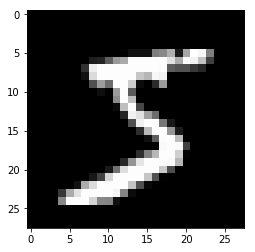

In [28]:
%matplotlib inline
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import matplotlib.pyplot as plt

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(pil_img)

(x_train, t_train), (x_test, t_test) \
= load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # transform into the default size
print(img.shape)  # (28, 28)

img_show(img)

ここでは、`flatten=True`として読み込んだので、一次元配列から三次元配列へ戻さないといけないことに注意する。  
  
## ニューラルネットワークの推論処理  
  
それでは、MNISTデータセットに対して推論処理を行うニューラルネットワークを実装する。  
ネットワークは、入力層を784個、出力層を10個のニューロンで構成する。  
また50個と100個のニューロンからなる隠れ層を2つ用意する。  

In [29]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import pickle
from dataset.mnist import load_mnist

def get_data():
    (x_train, t_train), (x_test, t_test) \
    = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

`init_network()`では、pickleファイルのsample_weight.pklに保存された学習済みの重みパラメータを読み込む。このファイルには、重みとバイアスのパラメータがディクショナリ型の変数として保存されている。  
（Jupyter Notebook上ではpickleファイルが生成されないっぽいのでpythonファイルに保存して実行しないとエラーを吐く）

In [ ]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # get index of the elemnt with the highest probability
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

ここでは最初にMNISTデータセットを取得し、ネットワークを生成する。  
次に、`x`に格納された画像データを1枚ずつｆｏｒ分で取り出し、`predict()`関数によって分類を行う。  
`predict()`の結果は各ラベルの確率がNumPy配列として出力される。  
例： [0.1, 0.2, 0.3, ...]（「0」の確率が0.1、「1」の確率が0.2…という意味）  
そして、この確率リストの中から一番大きな値のインデックスを取り出し、それを予測結果とする。  
  
なお、今回設定した`normalize=True`（データの値を0.0〜1.0の間にすること）を*正規化*と言う。  
また、ニューラルネットワークの入力データに対して何らかの決まった変換を行うことを*前処理*と言う。  
  
## バッチ処理  
  
図を見たほうがわかりやすいので本書のP78〜79を参照。  
  
簡単に言うと、入力データを100個など単位数ごとに扱うこと。  
バッチ処理により1枚あたりの処理時間を短縮できるので便利。  
（大きな配列を用いることで計算効率が上がるのと、データ転送の負荷の軽減などが主な理由）  
  
先程のコードをバッチ処理に対応させると以下のようになる。

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

`range(start, end, step)`は`start`から`ｅｎd`まで`ｓｔｅｐ`ごとに生成する変数。

In [31]:
print(list(range(0, 10)))
print(list(range(0, 10, 3)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


`range(0, len(x), batch_size)`は`x`をバッチサイズごとに区切ったインデックスのリストなので、そのリストの要素`i`番目から`i+batch_size`番目までを1つのバッチ`x_batch`に指定している。  
そして`argmax()`で最大値のインデックスを取得しているが、`axis=1`という引数に注意する。  
これは100×10の配列の中で1次元目の要素の中で最大値を見つけるよう設定している。（0次元目が最初の次元に対応するので1次元目の要素は最後の10個のラベルに対応する）